In [1]:
import tushare as ts
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm 
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://mp.weixin.qq.com/s/rkBthrSTjMqqqIyCuhe3cg
data = ts.get_hist_data("600036")

In [3]:
data.shape

(607, 13)

In [4]:
data.to_csv('chinastock600036.csv')

In [5]:
data=data.reset_index()

In [6]:
data.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2019-05-06,33.20,34.05,33.91,32.88,1133678.75,-0.54,-1.57,34.696,35.081,35.195,717771.04,607496.47,633613.14
1,2019-04-30,34.57,34.90,34.45,33.85,953712.00,-0.88,-2.49,35.074,35.273,35.224,599054.96,543607.57,611643.54
2,2019-04-29,34.57,35.73,35.33,34.42,550331.75,0.97,2.82,35.230,35.428,35.206,507450.98,532317.89,616277.75
3,2019-04-26,35.16,35.20,34.36,34.34,517344.44,-1.07,-3.02,35.124,35.377,35.135,540550.57,569776.81,646968.77
4,2019-04-25,35.35,35.86,35.43,35.28,433788.28,-0.37,-1.03,35.452,35.421,35.043,519431.40,554378.17,640472.68


In [7]:
data['date']=pd.to_datetime(data['date'])
data.sort_values(by='date',inplace=True)

In [8]:
data['date'][0].toordinal()

737185

In [9]:
data['uni_day']=data['date'].apply(lambda x: x.toordinal())
data['month']=data['date'].dt.month
data['week_in_year']=data['date'].dt.weekofyear
data['day_in_week']=data['date'].dt.dayofweek
data=data.reset_index()

In [10]:
data.head(30)

,index,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,uni_day,month,week_in_year,day_in_week
0,606,2016-11-07,17.91,17.93,17.91,17.85,208258.31,0.00,0.00,17.910,17.910,17.910,208258.31,208258.31,208258.31,736275,11,45,0
1,605,2016-11-08,17.92,18.06,17.99,17.89,262348.50,0.10,0.56,17.950,17.950,17.950,235303.41,235303.41,235303.41,736276,11,45,1
2,604,2016-11-09,18.00,18.08,17.89,17.77,342437.88,-0.10,-0.56,17.930,17.930,17.930,271014.90,271014.90,271014.90,736277,11,45,2
3,603,2016-11-10,17.95,18.11,17.99,17.94,271170.31,0.10,0.56,17.945,17.945,17.945,271053.75,271053.75,271053.75,736278,11,45,3
4,602,2016-11-11,17.95,18.08,18.03,17.93,276348.53,0.03,0.17,17.962,17.962,17.962,272112.71,272112.71,272112.71,736279,11,45,4
5,601,2016-11-14,18.00,18.25,18.03,17.95,353540.72,0.01,0.06,17.986,17.973,17.973,301169.19,285684.04,285684.04,736282,11,46,0
6,600,2016-11-15,18.10,18.24,18.18,18.03,256507.31,0.14,0.78,18.024,18.003,18.003,300000.95,281515.94,281515.94,736283,11,46,1
7,599,2016-11-16,18.23,18.29,18.12,18.05,235212.73,-0.06,-0.33,18.070,18.018,18.018,278555.92,275728.04,275728.04,736284,11,46,2
8,598,2016-11-17,18.11,18.14,18.12,18.01,271773.25,0.00,0.00,18.096,18.029,18.029,278676.51,275288.62,275288.62,736285,11,46,3
9,597,2016-11-18,18.12,18.16,18.11,18.03,185514.58,-0.01,-0.06,18.112,18.037,18.037,260509.72,266311.21,266311.21,736286,11,46,4


In [11]:
data.describe()

,index,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,uni_day,month,week_in_year,day_in_week
count,607.000000,607.000000,607.000000,607.000000,607.000000,6.070000e+02,607.000000,607.000000,607.000000,607.000000,607.000000,6.070000e+02,6.070000e+02,607.000000,607.000000,607.000000,607.000000,607.000000
mean,303.000000,26.272751,26.648188,26.313937,25.964893,4.989703e+05,0.030643,0.136738,26.259666,26.189036,26.047100,4.967753e+05,4.955116e+05,493186.856969,736726.046129,6.372323,26.049423,2.019769
std,175.370085,4.751504,4.870275,4.763605,4.651282,2.423656e+05,0.486112,1.744873,4.744189,4.718658,4.665163,1.850908e+05,1.666784e+05,152348.068810,262.249386,3.647834,15.888666,1.407056
min,0.000000,17.530000,17.610000,17.490000,17.390000,1.009080e+05,-2.240000,-6.470000,17.634000,17.705000,17.869000,1.460539e+05,2.015588e+05,208258.310000,736275.000000,1.000000,1.000000,0.000000
25%,151.500000,22.870000,23.245000,22.930000,22.530000,3.261156e+05,-0.220000,-0.825000,22.527000,22.319500,22.047500,3.648041e+05,3.796032e+05,388427.505000,736501.500000,3.000000,12.000000,1.000000
50%,303.000000,27.510000,28.020000,27.530000,27.140000,4.463508e+05,0.010000,0.050000,27.542000,27.463000,27.412000,4.613661e+05,4.649031e+05,463023.480000,736723.000000,6.000000,25.000000,2.000000
75%,454.500000,29.395000,29.800000,29.445000,28.980000,6.258716e+05,0.285000,1.105000,29.298000,29.296000,29.159000,6.092090e+05,6.034596e+05,604794.545000,736948.500000,10.000000,41.000000,3.000000
max,606.000000,35.900000,36.480000,36.000000,35.650000,1.551975e+06,1.890000,6.950000,35.630000,35.428000,35.224000,1.238826e+06,1.024262e+06,890276.620000,737185.000000,12.000000,52.000000,4.000000


In [12]:
data.columns

Index(['index', 'date', 'open', 'high', 'close', 'low', 'volume',
       'price_change', 'p_change', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10',
       'v_ma20', 'uni_day', 'month', 'week_in_year', 'day_in_week'],
      dtype='object')

In [13]:
X=np.array(data[['uni_day','close','volume','price_change', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10',
       'v_ma20','month','week_in_year','day_in_week']])
Y=np.array(data['close'])

#预测当前数据集1%天数的收盘价
forecast_out = int(math.ceil(0.01*len(data)))

forecast_col = 'close' 

#在原始表中记录预测到forecast_out天后的收盘价
data['label'] = data[forecast_col].shift(-forecast_out)

In [14]:
X_lately=X[-forecast_out:]

X = X[:-forecast_out]

Y=Y[forecast_out:]
print(X.shape,Y.shape,X_lately.shape)

(600, 13) (600,) (7, 13)


In [15]:
test_size= int(math.ceil(0.2*len(data)))
X_train=X[:-test_size]
X_test=X[-test_size:]
Y_train=Y[:-test_size]
Y_test=Y[-test_size:]
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(478, 13) (478,) (122, 13) (122,)


In [16]:
linreg = LinearRegression()  
linreg.fit(X_train, Y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
forecast_set = linreg.predict(X_test)
print(list(zip(Y_test,forecast_set)))

[(29.05, 29.308012047996044), (30.33, 29.857268844463533), (30.0, 30.141630935451985), (29.87, 30.088434686882238), (29.57, 28.5323055602596), (30.01, 29.282242590187252), (28.6, 29.515910820903628), (28.56, 29.58251984431695), (28.58, 30.641394025705267), (28.16, 30.090757181943218), (28.38, 30.174786676643862), (28.48, 30.089674892046332), (28.95, 30.540024761254244), (28.42, 29.33474121655695), (28.4, 29.451369398036604), (28.3, 29.426426973825073), (27.88, 29.05432557289123), (28.27, 29.20573420846131), (27.99, 29.210186853345476), (28.28, 29.331565644375587), (28.3, 28.859279241222794), (28.55, 28.999108285305283), (29.46, 28.976319158240813), (29.57, 28.75378638029929), (29.37, 28.86441975452044), (28.9, 28.574400788232424), (28.58, 28.83643525110915), (28.34, 28.803050954973514), (28.51, 28.963436751010704), (28.46, 29.69299911679991), (28.75, 29.68468609148499), (28.33, 29.598463999664318), (28.29, 29.35348156034206), (27.91, 29.191886985932797), (26.77, 28.7217896593354), (25.

In [40]:
df3=pd.concat([pd.DataFrame(Y_test),pd.DataFrame(forecast_set)],axis=1,join="outer",ignore_index=True)
df3

,0,1
0,29.05,29.308012
1,30.33,29.857269
2,30.00,30.141631
3,29.87,30.088435
4,29.57,28.532306
5,30.01,29.282243
6,28.60,29.515911
7,28.56,29.582520
8,28.58,30.641394
9,28.16,30.090757


In [41]:
df4=pd.DataFrame(data[(len(X_train)+forecast_out-1):(len(X_train)+len(X_test)+forecast_out-1)]['date']).reset_index().drop(columns='index')
df4

,date
0,2018-10-31
1,2018-11-01
2,2018-11-02
3,2018-11-05
4,2018-11-06
5,2018-11-07
6,2018-11-08
7,2018-11-09
8,2018-11-12
9,2018-11-13


In [42]:
df3=pd.concat([df3,df4],axis=1,join="outer",ignore_index=True)
df3.rename({0:'Y_test',1:'forecast',2:'date'},axis=1,inplace=True)
df3

,Y_test,forecast,date
0,29.05,29.308012,2018-10-31
1,30.33,29.857269,2018-11-01
2,30.00,30.141631,2018-11-02
3,29.87,30.088435,2018-11-05
4,29.57,28.532306,2018-11-06
5,30.01,29.282243,2018-11-07
6,28.60,29.515911,2018-11-08
7,28.56,29.582520,2018-11-09
8,28.58,30.641394,2018-11-12
9,28.16,30.090757,2018-11-13


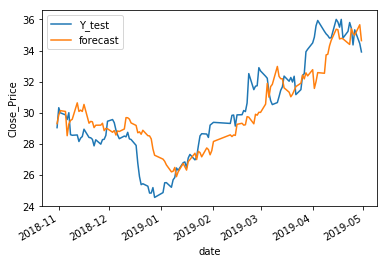

In [43]:
df3.plot(x='date',y=['Y_test','forecast']) 
plt.xlabel('date')  
plt.ylabel('Close_Price')  
plt.show()  

In [49]:
Y_lately_forecast=linreg.predict(X_lately)

forcast_date=data[-forecast_out:]['date']

#预测7个交易日后股票收盘价，根据20190506可预测20190515价格，即Y_lately_forecast最后一位

,index,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,uni_day,month,week_in_year,day_in_week,label
600,6,2019-04-23,34.70,35.59,35.23,34.67,495692.12,0.43,1.24,35.472,35.301,34.676,488160.19,581695.23,641654.17,737172,4,17,1,NaN
601,5,2019-04-24,35.53,35.90,35.80,34.82,540098.31,0.57,1.62,35.466,35.374,34.892,497221.89,568250.94,648490.99,737173,4,17,2,NaN
602,4,2019-04-25,35.35,35.86,35.43,35.28,433788.28,-0.37,-1.03,35.452,35.421,35.043,519431.40,554378.17,640472.68,737174,4,17,3,NaN
603,3,2019-04-26,35.16,35.20,34.36,34.34,517344.44,-1.07,-3.02,35.124,35.377,35.135,540550.57,569776.81,646968.77,737175,4,17,4,NaN
604,2,2019-04-29,34.57,35.73,35.33,34.42,550331.75,0.97,2.82,35.230,35.428,35.206,507450.98,532317.89,616277.75,737178,4,18,0,NaN
605,1,2019-04-30,34.57,34.90,34.45,33.85,953712.00,-0.88,-2.49,35.074,35.273,35.224,599054.96,543607.57,611643.54,737179,4,18,1,NaN
606,0,2019-05-06,33.20,34.05,33.91,32.88,1133678.75,-0.54,-1.57,34.696,35.081,35.195,717771.04,607496.47,633613.14,737185,5,19,0,NaN


In [51]:
Y_lately_forecast[-1:]

array([34.4365408])